<a href="https://colab.research.google.com/github/0lucasmoura/TreinamentoHackathonIA2020/blob/master/Aula_DataScience_Notebook_participantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ferramentas para analise e visualização de dados

Importando ferramentas!

In [0]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt

#### NUMPY



NumPy é um pacote para a linguagem Python que suporta arrays e matrizes multidimensionais, possuindo uma larga coleção de funções matemáticas para trabalhar com estas estruturas. 

In [2]:
print(np.__doc__) 


NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://www.scipy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as `np`::

  >>> import numpy as np

Code snippets are indicated by three greater-than signs::

  >>> x = 42
  >>> x = x + 1

Use the built-in ``help`` function to view a function's docstring::

  >>> help(np.sort)
  ... # doctest: +SKIP

For some objects, ``np.info(obj)`` may provide additional help.  This is
particularl

Estruturas básicas:

In [0]:
lista = [1,2,3]
lista_R2 = [[1,2,3]]
lista_R3 =[[[1,2,3]]]

In [4]:
print(np.array(lista))
print(np.array(lista).shape)

[1 2 3]
(3,)


In [5]:
print(np.array(lista_R2))
print(np.array(lista_R2).shape)

[[1 2 3]]
(1, 3)


In [6]:
print(np.array(lista_R3))
print(np.array(lista_R3).shape)

[[[1 2 3]]]
(1, 1, 3)


Numpy arrays possuem tipagem!

In [7]:
np.array([1,2,3]).dtype

dtype('int64')

In [8]:
np.array([1.,2.,3.]).dtype

dtype('float64')

In [9]:
np.array([1,2,3], np.int32).dtype

dtype('int32')

In [10]:
my_int32_arr = np.array([1,2,3], np.int32)

# stack overflow example
# sub 1 to get max int32 val
my_int32_arr[0] = 2**31

print(my_int32_arr)
print(my_int32_arr.dtype)
print(my_int32_arr - 1)
print((my_int32_arr - 1).dtype)

[-2147483648           2           3]
int32
[2147483647          1          2]
int32


In [0]:
# my_int32_arr[0] = 'A'

In [12]:
my_int32_arr[0] = '12'
print(my_int32_arr)

[12  2  3]


Devido a essa implementação em  mais baixo nivel, operações utilizando numpy arrays são, no geral, mais eficientes que utilizando estruturas nativas do python.

In [0]:
import timeit

In [0]:
lista = list(np.linspace(0,1000, 200))
array = np.linspace(0, 1000, 200)

In [15]:
print(lista[:5])
print(array[:5])

[0.0, 5.025125628140704, 10.050251256281408, 15.075376884422113, 20.100502512562816]
[ 0.          5.02512563 10.05025126 15.07537688 20.10050251]


In [16]:
timeit.timeit('np.mean(lista)', globals={'np':np, 'lista':lista})

26.314796904000005

In [17]:
timeit.timeit('np.mean(array)', globals={'np':np, 'array':array})

6.368301143000025

Exemplo pratico

In [18]:
# Faça uma função que padronize a lista declarada abaixo utilizando python puro
# https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9
# utilize o z-score para isso

lista = list(np.linspace(0,1000, 200))
print('Primeiros Itens da Lista Original:{}'.format(lista[:5]))
from statistics import stdev, mean

def standartize_pure_python(lista):
  mean = sum(lista)/len(lista)
  lista2 = (lista - mean)**2
  dp = (sum(lista2)/len(lista2))**(1/2)

  z_score = []
  for item in lista:
    z_score.append((item-mean)/dp)
  return z_score


def standartize_vectorized(lista):
  mean = np.mean(lista)
  dp = np.std(lista)

  return (lista - mean)/dp
z_array = standartize_pure_python(lista)
z_lista = standartize_vectorized(lista)


# assert(z_array == z_lista)

Primeiros Itens da Lista Original:[0.0, 5.025125628140704, 10.050251256281408, 15.075376884422113, 20.100502512562816]


In [0]:
z_lista = standartize_pure_python(lista)
z_array = standartize_vectorized(lista)

In [0]:
# assert (z_lista == z_array).all()

In [0]:
from scipy import stats

In [0]:
# assert (stats.zscore(lista) == z_array).all()
# assert (stats.zscore(lista) == z_lista).all()

Testes de eficiencia

In [23]:
print("Padronizar com python puro: "
      f"{timeit.timeit('standartize_pure_python(lista)', globals={'lista': lista, 'standartize_pure_python': standartize_pure_python}, number=10000)}")
print("Padronizar com numpy: "
      f"{timeit.timeit('standartize_vectorized(lista)', globals={'lista': lista, 'standartize_vectorized': standartize_vectorized}, number=10000)}")
print("Padronizar usando scipy: "
      f"{timeit.timeit('zscore(lista)', globals={'lista': lista, 'zscore': stats.zscore}, number=10000)}")

Padronizar com python puro: 1.3869926880000207
Padronizar com numpy: 0.9008184200000073
Padronizar usando scipy: 0.6684305880000068


#### SCIPY

Implementa diversos algoritmos bastante úteis para diversas aplicações em engenharia, ciencia e matemática!

Feito em python e construido em cima do numpy!!

#### PANDAS

 pandas é uma ferramenta performatica, facil, poderosa e flexivel construída em cima do python e numpy. 

 Suas estruturas principais são as Series e os DataFrames.

 Utilizamos pandas a todo momento para manipulação de qualquer dado, desde textos a inclusive imagens.

 Sua flexibilidade é tãão grande que frameworks de machine learning e outros conseguem aceitar como input suas estruturas de dados.

 O nosso objetivo no momento éé o de utilizar pandas para a anáálise exploratoria dos dados e para limpeza dos mesmos.

 O preparo dos dados éé uma das partes mais importantes da modelagem para modelos de machine learning.

In [0]:
# primeiramente vamos carregar o csv que esta no workspace
# Dataset retirado do kaggle: https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region

**wsid:**
Weather station id

**wsnm:**
Name station (usually city location or nickname)

**elvt:**
Elevation

**lat:**
Latitude

**lon:**
Longitude

**inme:**
Station number (INMET number) for the location

**city:**
City

**prov:**
State (Province)

**mdct:**
Observation Datetime (complete date: date + time)

**date:**
Date of observation

**yr:**
The year (2000-2016)

**mo:**
The month (0-12)

**da:**
The day (0-31)

**hr:**
The hour (0-23)

**prcp:**
Amount of precipitation in millimetres (last hour)

**stp:**
Air pressure for the hour in hPa to tenths (instant)

**smax:**
Maximum air pressure for the last hour in hPa to tenths

**smin:**
Minimum air pressure for the last hour in hPa to tenths

**gbrd:**
Solar radiation KJ/m2

**temp:**
Air temperature (instant) in celsius degrees

**dewp:**
Dew point temperature (instant) in celsius degrees

**tmax:**
Maximum temperature for the last hour in celsius degrees

**dmax:**
Maximum dew point temperature for the last hour in celsius degrees

**tmin:**
Minimum temperature for the last hour in celsius degrees

**dmin:**
Minimum dew point temperature for the last hour in celsius degrees

**hmdy:**
Relative humid in % (instant)

**hmax:**
Maximum relative humid temperature for the last hour in %

**hmin:**
Minimum relative humid temperature for the last hour in %

**wdsp:**
Wind speed in metres per second

**wdct:**
Wind direction in radius degrees (0-360)

**gust:**
Wind gust in metres per second

In [0]:
df = pd.read_csv('dataset_INMET_sudeste_1000.csv')

In [0]:
# checar 5 primeiras entradas/observações do dataframe
df.head()

In [0]:
# Aparentemente a coluna 0 deveria ser a coluna de index
# df = pd.read_csv('dataset_INMET_sudeste_1000.csv', index_col=0)

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1hp51SXQryzd_bg5O3CtyCB6JaKL6JK9T'

fluff, id = link.split('=')

# Dataset Import
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df = pd.read_csv('Filename.csv', index_col=0)

In [27]:
df.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,2007,11,6,0,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,2007,11,6,1,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,2007,11,6,2,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,2007,11,6,3,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,2007,11,6,4,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [28]:
# checar tipos e colunas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 31 columns):
wsid    1000 non-null int64
wsnm    1000 non-null object
elvt    1000 non-null float64
lat     1000 non-null float64
lon     1000 non-null float64
inme    1000 non-null object
city    1000 non-null object
prov    1000 non-null object
mdct    1000 non-null object
date    1000 non-null object
yr      1000 non-null int64
mo      1000 non-null int64
da      1000 non-null int64
hr      1000 non-null int64
prcp    389 non-null float64
stp     1000 non-null float64
smax    1000 non-null float64
smin    1000 non-null float64
gbrd    581 non-null float64
temp    1000 non-null float64
dewp    1000 non-null float64
tmax    1000 non-null float64
dmax    1000 non-null float64
tmin    1000 non-null float64
dmin    1000 non-null float64
hmdy    1000 non-null float64
hmax    1000 non-null float64
hmin    1000 non-null float64
wdsp    969 non-null float64
wdct    1000 non-null float64
gust    996 n

In [29]:
df.isna().sum()

wsid      0
wsnm      0
elvt      0
lat       0
lon       0
inme      0
city      0
prov      0
mdct      0
date      0
yr        0
mo        0
da        0
hr        0
prcp    611
stp       0
smax      0
smin      0
gbrd    419
temp      0
dewp      0
tmax      0
dmax      0
tmin      0
dmin      0
hmdy      0
hmax      0
hmin      0
wdsp     31
wdct      0
gust      4
dtype: int64

In [0]:
df1 = df.drop(columns=['date', 'yr', 'mo', 'da', 'hr']) # ou adicionar a flag inplace=True

In [31]:
df1.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [32]:
# todas do rio de janeiro
df1.prov.unique()

array(['RJ'], dtype=object)

In [33]:
# e da estacao de sao goncalo
df1.wsnm.unique()

array(['SÃO GONÇALO'], dtype=object)

In [34]:
df1.wsid.unique()

array([178])

In [35]:
df1.elvt.unique()

array([237.])

In [36]:
df1.lat.unique()

array([-6.835777])

In [37]:
df1.inme.unique() #Tambem é único

array(['A333'], dtype=object)

In [0]:
# por conta disso irei removar informacoes sobre o id elevacao e latidude
df1.drop(columns=['wsid', 'wsnm', 'elvt', 'lat', 'lon'], inplace=True)

In [39]:
df1.head()

,inme,city,prov,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,A333,São Gonçalo,RJ,2007-11-06 00:00:00,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,A333,São Gonçalo,RJ,2007-11-06 01:00:00,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,A333,São Gonçalo,RJ,2007-11-06 02:00:00,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,A333,São Gonçalo,RJ,2007-11-06 03:00:00,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,A333,São Gonçalo,RJ,2007-11-06 04:00:00,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [40]:
df1.isna().sum()

inme      0
city      0
prov      0
mdct      0
prcp    611
stp       0
smax      0
smin      0
gbrd    419
temp      0
dewp      0
tmax      0
dmax      0
tmin      0
dmin      0
hmdy      0
hmax      0
hmin      0
wdsp     31
wdct      0
gust      4
dtype: int64

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
inme    1000 non-null object
city    1000 non-null object
prov    1000 non-null object
mdct    1000 non-null object
prcp    389 non-null float64
stp     1000 non-null float64
smax    1000 non-null float64
smin    1000 non-null float64
gbrd    581 non-null float64
temp    1000 non-null float64
dewp    1000 non-null float64
tmax    1000 non-null float64
dmax    1000 non-null float64
tmin    1000 non-null float64
dmin    1000 non-null float64
hmdy    1000 non-null float64
hmax    1000 non-null float64
hmin    1000 non-null float64
wdsp    969 non-null float64
wdct    1000 non-null float64
gust    996 non-null float64
dtypes: float64(17), object(4)
memory usage: 171.9+ KB


In [0]:
df1.inme = df1.inme.astype('category')
df1.city = df1.city.astype('category')
df1.prov = df1.prov.astype('category')

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
inme    1000 non-null category
city    1000 non-null category
prov    1000 non-null category
mdct    1000 non-null object
prcp    389 non-null float64
stp     1000 non-null float64
smax    1000 non-null float64
smin    1000 non-null float64
gbrd    581 non-null float64
temp    1000 non-null float64
dewp    1000 non-null float64
tmax    1000 non-null float64
dmax    1000 non-null float64
tmin    1000 non-null float64
dmin    1000 non-null float64
hmdy    1000 non-null float64
hmax    1000 non-null float64
hmin    1000 non-null float64
wdsp    969 non-null float64
wdct    1000 non-null float64
gust    996 non-null float64
dtypes: category(3), float64(17), object(1)
memory usage: 151.6+ KB


In [0]:
df1.prcp.fillna(0, inplace=True)
df1.gbrd.fillna(0, inplace=True)

In [45]:
df1.isna().sum()

inme     0
city     0
prov     0
mdct     0
prcp     0
stp      0
smax     0
smin     0
gbrd     0
temp     0
dewp     0
tmax     0
dmax     0
tmin     0
dmin     0
hmdy     0
hmax     0
hmin     0
wdsp    31
wdct     0
gust     4
dtype: int64

In [46]:
df1.head()

,inme,city,prov,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,A333,São Gonçalo,RJ,2007-11-06 00:00:00,0.0,982.5,982.5,981.3,0.0,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,A333,São Gonçalo,RJ,2007-11-06 01:00:00,0.0,983.2,983.2,982.5,0.0,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,A333,São Gonçalo,RJ,2007-11-06 02:00:00,0.0,983.5,983.5,983.2,0.0,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,A333,São Gonçalo,RJ,2007-11-06 03:00:00,0.0,983.7,983.7,983.4,0.0,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,A333,São Gonçalo,RJ,2007-11-06 04:00:00,0.0,983.7,983.8,983.6,0.0,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [0]:
df1['mdct_name'] = df1.mdct
df1.mdct = pd.to_datetime(df1.mdct)

In [48]:
df1.mdct_name

0      2007-11-06 00:00:00
1      2007-11-06 01:00:00
2      2007-11-06 02:00:00
3      2007-11-06 03:00:00
4      2007-11-06 04:00:00
              ...         
995    2007-12-17 11:00:00
996    2007-12-17 12:00:00
997    2007-12-17 13:00:00
998    2007-12-17 14:00:00
999    2007-12-17 15:00:00
Name: mdct_name, Length: 1000, dtype: object

In [49]:
df1.mdct

0     2007-11-06 00:00:00
1     2007-11-06 01:00:00
2     2007-11-06 02:00:00
3     2007-11-06 03:00:00
4     2007-11-06 04:00:00
              ...        
995   2007-12-17 11:00:00
996   2007-12-17 12:00:00
997   2007-12-17 13:00:00
998   2007-12-17 14:00:00
999   2007-12-17 15:00:00
Name: mdct, Length: 1000, dtype: datetime64[ns]

In [0]:
df1.index = df1.mdct
# df1.drop(columns='mdct', inplace=True)

In [51]:
df1.head()

,inme,city,prov,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust,mdct_name
mdct,,,,,,,,,,,,,,,,,,,,,,
2007-11-06 00:00:00,A333,São Gonçalo,RJ,2007-11-06 00:00:00,0.0,982.5,982.5,981.3,0.0,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5,2007-11-06 00:00:00
2007-11-06 01:00:00,A333,São Gonçalo,RJ,2007-11-06 01:00:00,0.0,983.2,983.2,982.5,0.0,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4,2007-11-06 01:00:00
2007-11-06 02:00:00,A333,São Gonçalo,RJ,2007-11-06 02:00:00,0.0,983.5,983.5,983.2,0.0,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9,2007-11-06 02:00:00
2007-11-06 03:00:00,A333,São Gonçalo,RJ,2007-11-06 03:00:00,0.0,983.7,983.7,983.4,0.0,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8,2007-11-06 03:00:00
2007-11-06 04:00:00,A333,São Gonçalo,RJ,2007-11-06 04:00:00,0.0,983.7,983.8,983.6,0.0,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5,2007-11-06 04:00:00


In [0]:
# salvar dataframe limpo
df1.to_csv('dataset_INMET_sudeste_1000_limpo.csv')

#### PLOTTING

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


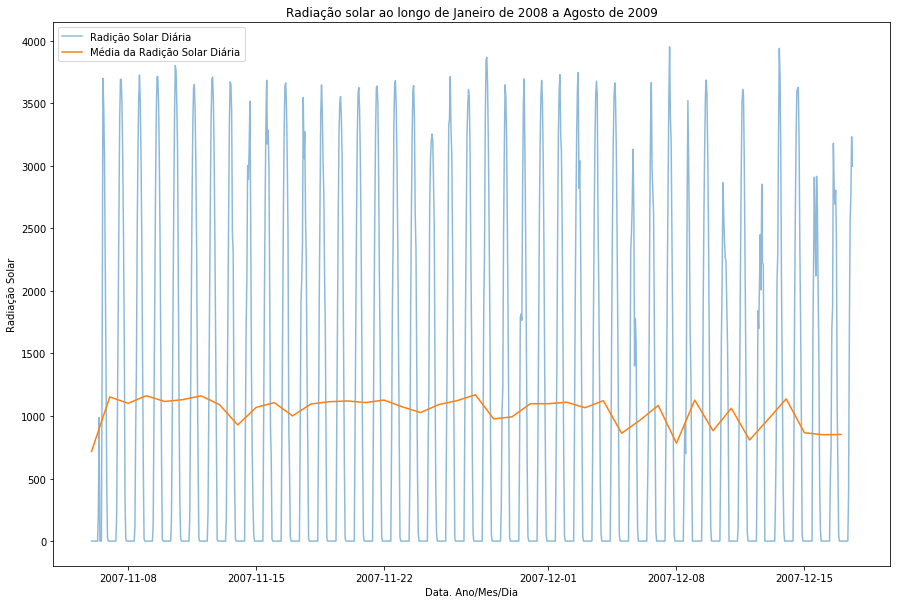

In [53]:
plt.figure(figsize=(15,10))

plt.plot(df1.index, df1.gbrd, alpha=0.5, label='Radição Solar Diária')
plt.plot(df1.resample('d').gbrd.mean(), label='Média da Radição Solar Diária')

plt.title('Radiação solar ao longo de Janeiro de 2008 a Agosto de 2009')
plt.xlabel('Data. Ano/Mes/Dia')
plt.ylabel('Radiação Solar')

plt.legend()
plt.show()

In [0]:
# Faça o plot com outras colunas! Seja criativo(a)!

# Velocidade e Direção do vento

Verificou-se que no dataset, existia uma coluna com os dados temporais de velocidade de vento. Plotou-se, esse dado em relação ao tempo e obtemos o seguinte gráfico.

In [55]:
import plotly.graph_objects as go
import numpy as np


fig = go.Figure([go.Scatter(x=df1.index, y=df1.wdsp)])
fig.show()

Nele, verificamos toda a alteração da velocidade do vento em relação ao tempo.

Existe uma certa periodicidade nas velocidades, mas apenas essa informação sem a sua direção pode não significar muita coisa.

Portanto, propõe-se a indicação da direção do vento junto com sua velocidade.




Como temos a informação da direção do vento em graus, podemos utilizar essa informação para identificar as componentes do vetor velocidade a partir do seno e cosseno do angulo de direção junto com o valor de sua velocidade (que teve seus valores nulos preenchidos com o valor 0). 

In [0]:
df1.wdsp.fillna(0, inplace=True)

df1['catop'] =  np.sin(np.deg2rad(df1.wdct))*(df1.wdsp)
df1['catad'] =  np.cos(np.deg2rad(df1.wdct))*(df1.wdsp)

A partir dessas novas colunas, é possível identificar de forma clara a intensidade e a direção do vento em um determinado momento, como mostrado a seguir.

In [57]:
import plotly.express as px
from random import randint


rand = randint(0, df1.shape[0])

while (not df1.iloc[[rand]]['wdsp'].values[0]):
  rand = randint(0, df1.shape[0])

values = df1.iloc[[rand]][['wdsp', 'wdct', 'catop', 'catad']]
print('Selected Column Index= {rand}\n{column}'.format(rand=rand, column=values))

fig = px.line(x=[0, values.catad.values[0]], y=[0, values.catop.values[0]])
fig.update_xaxes(range=[values.wdsp.values[0]*(-1), values.wdsp.values[0] + 0.2])
fig.update_yaxes(range=[values.wdsp.values[0]*(-1), values.wdsp.values[0] + 0.2])
fig.show()

Selected Column Index= 803
                     wdsp  wdct     catop    catad
mdct                                              
2007-12-09 11:00:00   3.2  99.0  3.160603 -0.50059


Mas essa representação bidimencional apenas informa a velocidade e direção do vento em um ponto do tempo. Portanto, plotou-se todas as ocorrencias de vetores de vento na dimensão do tempo, resultando no seguinte gráfico 3D:

In [58]:
fig = go.Figure(data=go.Scatter3d(
    x=df1.index, y=df1.catop, z=df1.catad,
    marker=dict(
        size=0,
        color=df1.wdsp,
        colorscale='Viridis',
    ),
    line=dict(
        color='darkblue',
        width=0
    ))
    )

fig.show()

Essa representação é mais completa e possibilita uma interpretação dos dados no tempo, sendo possível notar que o vento tende a soprar mais para direções entre -90 e 90 graus. Apesar de ser possível iteragir com esse gráfico, como existem muitos dados, fica mais dificil de ser interpretado. Portanto, realizou-se a plotagem em duas direções de todos os dados obtidos em um gráfico bidimencional para todos os tempos de amostra e adiciou-se um botão para animar a mudança da direção e intensidade do vento ao longo de todas as amostras existentes. Isso está representado a seguir.

In [59]:
fig = go.Figure(
    data=go.Scatter(
        x=df1.catad, y=df1.catop,
        marker=dict(
            size=4,
            color=df1.wdsp,
            colorscale='Viridis',
        ),
        line=dict(
            color='darkblue',
            width=2
        )),
        layout=go.Layout(
            xaxis=dict(range=[np.min(df1.catad), np.max(df1.catad)], autorange=False, zeroline=False),
            yaxis=dict(range=[np.min(df1.catop), np.max(df1.catop)], autorange=False, zeroline=False),
            title="Direção do vento",
            hovermode="closest",
            updatemenus=[dict(
                type="buttons",
                buttons=[dict(label="Play",
                              method="animate",
                              args=[None])])]
        ),
        frames=[go.Frame(
            data=[go.Scatter(
                x=[(df1.catad).iloc[[k]].values[0]],
                y=[(df1.catop).iloc[[k]].values[0]],
                mode="markers",
                marker=dict(color="red", size=10))])

            for k in range(df1.shape[0])]
    )

fig.show()

Para melhor controle do dado temporal, alterou-se a representação para permitir a seleção da amostra de interesse a partir do scatter do plotly express, apresentado a seguir. 

In [60]:
df1['catop'] =  np.sin(np.deg2rad(df1.wdct))*(df1.wdsp)
df1['catad'] =  np.cos(np.deg2rad(df1.wdct))*(df1.wdsp)


fig = px.scatter(df1, x="catop", y="catad", animation_frame=[n for n in range(df1.shape[0])],
           color="wdsp", hover_name="wdsp")

fig.update_xaxes(range=[min(df1.catop.min(), df1.catad.min()), max(df1.catop.max(), df1.catad.max())])
fig.update_yaxes(range=[min(df1.catop.min(), df1.catad.min()), max(df1.catop.max(), df1.catad.max())])
fig.update_traces(marker_size=10)

fig.show()